# **Optimization - Exercise 2 - Gradient Descent**
---

In [18]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Finding the minimum of a function

We start with a very simple implementation of the Gradient Descent method to illustrate the underlying concept.

Consider the function $f(x) = x^2$, which is convex and has a unique global minimum $x^*$ (the minimum is obviously $x^* = 0$, but let's pretend we don't know it).

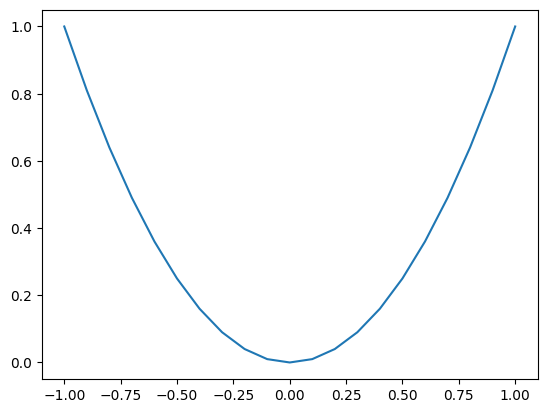

In [19]:
def objective(x):
    return x**2

# sample input range [-1,1] uniformly at 0.1 increments
inputs = np.arange(-1, 1+0.1, 0.1)

results = objective(inputs)
plt.plot(inputs, results)

In order to find $x^*$ such that $f(x^*)$ is minimum, we start from an arbitrary initial value $x_0 \in dom(f)$, we choose a learning rate $\gamma$, and iterate the step $x = x - \gamma \nabla f(x)$.

Since we have just one variable, the gradient of $f(x)$ is its derivative: $\nabla f(x) = \nabla (x^2) = 2x$, so the gradient descent step takes the form $x = x - \gamma 2 x$.





In [20]:
def derivative(x):
    return 2*x

def naive_gradient_descent(x_0, max_iters, gamma):
    solutions = [x_0]
    scores = [objective(x_0)]
    x = x_0

    # Simple implementation with a fixed number of iterations
    for i in range(max_iters):
        gradient = derivative(x)
        x = x - gamma * gradient
        score = objective(x)

        solutions.append(x)
        scores.append(score)
    return solutions, scores

Now we can test this implementation trying various values for $x_0$ and $\gamma$. Note that the naive Gradient Descent method is **not** guaranteed to converge for arbitrary values of $\gamma$. In this case, it is quite easy to see that $x = x - \gamma 2 x$ converges to $0$ only for $\gamma < 1$.

best value of x after 30 iterations: 0.0009903520314283045


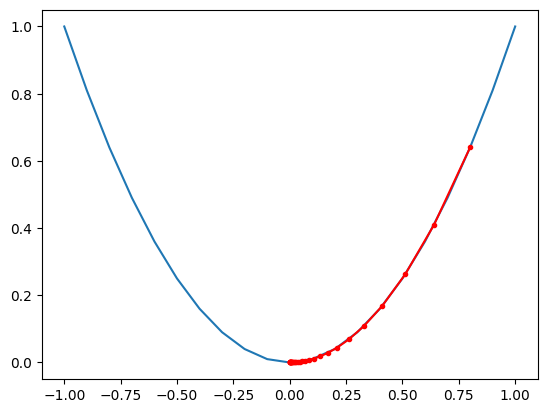

In [21]:
# Try different values for x_0 and gamma
x_0 = 0.8
max_iters = 30
gamma = 0.1

solutions, scores = naive_gradient_descent(x_0, max_iters, gamma)

# plot f(x) again
plt.plot(inputs, results)

#plot the values of x at the various steps (in red)
plt.plot(solutions, scores, '.-', color='red')

# read the best value of x found so far
print("best value of x after", max_iters, "iterations:" , solutions[-1])

# Least Squares Estimation
Least squares estimation is one of the fundamental machine learning algorithms. Suppose we want to fit a hyperplane to a set of data points $x_1, \dots , x_n \in \mathbb{R}^d$, based on the hypothesis that the points actually come (approximately) from a hyperplane. For simplicity, let us do this in $\mathbb{R}^2$ and fit a linear model, searching for a non-vertical line of the form $y = w_0 + w_1 x$.

![](https://i.ibb.co/7k78YDd/least-square.png)

If we have $n$ data points from $(x_1, y_1)$ to $(x_n, y_n)$, the least square fit chooses $w_0$ and $w_1$ such that $f(w_0, w_1) = \sum_{i=1}^n(w_0 + w_1x_i - y_i)^2$ is minimized. <br />
This sum can be expressed in matrix form as $\|Ax - b\|^2$, where:
<br /><br />
$Ax - b =
     \begin{bmatrix}
         1 & x_1\\
         1 & x_2\\
         \vdots & \vdots\\
         1 & x_n
     \end{bmatrix}
     \times
     \begin{bmatrix}
         w_0\\
         w_1\\
     \end{bmatrix}
      -
     \begin{bmatrix}
         y_1\\
         y_2\\
         \vdots\\
         y_n
     \end{bmatrix}
     =
     \begin{bmatrix}
         w_0 + x_1w_1 - y_1\\
         w_0 + x_2w_1 - y_2\\
         \vdots\\
         w_0 + x_nw_1 - y_n\\
     \end{bmatrix}
$
<br /><br />
In this exercise, we will try to find $x = [w_0, w_1]^\top$ using Least Squares Estimation, implementing the Gradient Descent method.


# Load the data

For this first implementation, we will load the [breast cancer dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset), using the first and third attributes (tumor mean radius and perimeter) as datapoints in two dimensions and trying to fit them on a line.

In [22]:
from sklearn.datasets import load_breast_cancer

def standardize(x):
    """Standardize the original data points (mean 0 and std dev 1)."""
    x = x - np.mean(x)
    x = x / np.std(x)
    return x

def build_model_data(x, y):
    """Get regression data in matrix form."""
    b = y
    num_samples = len(b)
    A = np.c_[np.ones(num_samples), x]
    return A, b

# Loads sklearn's Breast Cancer dataset
dataset = load_breast_cancer()

# Use as datapoints the first and third columns
radius = dataset.data[:,0]
perimeter = dataset.data[:,2]

A, b = build_model_data(standardize(radius), standardize(perimeter))

Number of samples n = 

 569
Dimension of each sample d =  2


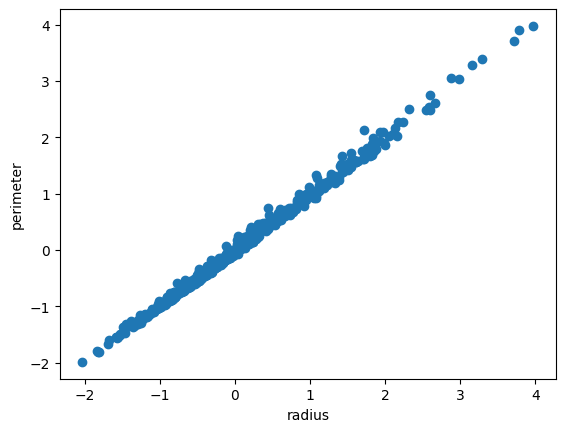

In [23]:
# Take a look at our data
plt.xlabel ('radius')
plt.ylabel ('perimeter')
plt.scatter(A[:,1], b)

print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

# Gradient Descent Implementation

Complete the `gradient_descent` function below, filling in also the `compute_gradient` and `calculate_objective` functions.

In [ ]:
def calculate_objective(Axmb):
    """Calculate ||Ax - b||^2 for the vector Axmb = Ax - b"""
    # ***************************************************
    # YOUR CODE HERE
    obj = (Axmb**2).sum()
    #obj = (Axmb).T.dot(Axmb)
    # ***************************************************
    return obj

def compute_gradient(A, x, b):
    """Compute the gradient and objective function."""
    # ***************************************************
    # YOUR CODE HERE
    Axmb = A.dot(x) - b
    grad = 2 * A.T.dot(Axmb)
    # ***************************************************
    return grad, Axmb

def gradient_descent(A, initial_x, b, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store x and objective func. values
    xs = [initial_x]
    objectives = []
    x = initial_x
    for n_iter in range(max_iters):

        # compute objective and gradient
        grad, Axmb = compute_gradient(A, x, b)
        obj = calculate_objective(Axmb)

        # ***************************************************
        # YOUR CODE HERE
        # update x by a gradient descent step
        x = x - gamma * grad
        # ***************************************************

        # store x and objective function value
        xs.append(x)
        objectives.append(obj)
        print("Gradient Descent({bi}/{ti}): objective={l:.5f}, x=[{w0:.5f},{w1:.5f}]".format(
              bi=n_iter, ti=max_iters - 1, l=obj, w0=x[0], w1=x[1]))

    return objectives, xs

## Naive test

Now you can test your gradient descent function with a naive step size through gradient descent demo shown below:

In [ ]:
# Define the parameters of the algorithm.
max_iters = 30
gamma = 0.001  # gamma = 0.1 does not converge

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/29): objective=569.00000, x=[-0.00000,1.13556]
Gradient Descent(1/29): objective=13.22768, x=[0.00000,0.97885]
Gradient Descent(2/29): objective=2.64355, x=[0.00000,1.00048]
Gradient Descent(3/29): objective=2.44199, x=[0.00000,0.99749]
Gradient Descent(4/29): objective=2.43815, x=[0.00000,0.99791]
Gradient Descent(5/29): objective=2.43807, x=[0.00000,0.99785]
Gradient Descent(6/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(7/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(8/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(9/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(10/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(11/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(12/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(13/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(14/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(15/29): objective=2.43807, x=

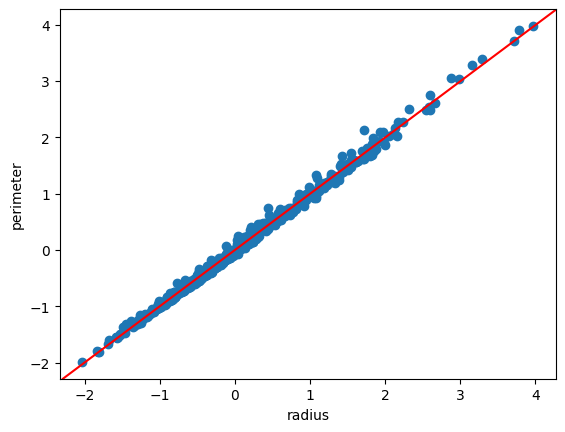

In [26]:
w0_star = gradient_xs_naive[-1][0]
w1_star = gradient_xs_naive[-1][1]

# Visualize our solution
plt.xlabel ('radius')
plt.ylabel ('perimeter')
plt.scatter(A[:,1], b)

plt.axline((0, w0_star), slope=w1_star, color='red')

Now try doing gradient descent with a better learning rate instead of a fixed $\gamma$.

# Gradient descent with smoothness constant $L$

In general, quadratic functions are $L$-smooth. It can be proved that function $f = \|Ax - b\|^2$ is $L$-smooth with $L = 2\|A^\top A\|$. Please fill in the function `calculate_L` below and use it to improve the learning rate of the algorithm.

*Hint*: you can use the function `np.linalg.norm` with parameter `ord=2` to compute the spectral norm of a matrix.

In [27]:
def calculate_L(A, b):
    """Calculate the smoothness constant for f"""
    # ***************************************************
    # YOUR CODE HERE
    # compute L = smoothness constant of f
    L = 2 * np.linalg.norm(A.T.dot(A), ord=2)
    # ***************************************************
    return L

In [28]:
# Define the parameters of the algorithm.
max_iters = 30

# ***************************************************
# YOUR CODE HERE
# a better learning rate using the smoothness of f
L = calculate_L(A, b)
gamma = 1/L
# ***************************************************

# Initialization
x_initial = np.zeros(A.shape[1])

# Start gradient descent.
gradient_objectives, gradient_xs = gradient_descent(A, x_initial, b, max_iters, gamma)

Gradient Descent(0/29): objective=569.00000, x=[-0.00000,0.99786]
Gradient Descent(1/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(2/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(3/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(4/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(5/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(6/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(7/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(8/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(9/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(10/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(11/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(12/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(13/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(14/29): objective=2.43807, x=[0.00000,0.99786]
Gradient Descent(15/29): objective=2.43807, x=[

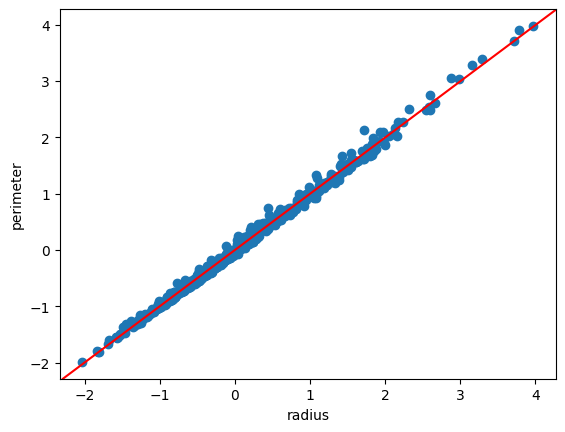

In [29]:
w0_star = gradient_xs[-1][0]
w1_star = gradient_xs[-1][1]

# Visualize our solution
plt.xlabel ('radius')
plt.ylabel ('perimeter')
plt.scatter(A[:,1], b)

plt.axline((0, w0_star), slope=w1_star, color='red')

# Loading more complex data

The same gradient descent algorithm can be applied in any number $d$ of dimensions (corresponding to columns of the matrix $A$). In this case we are not searching for a line anymore.

With $d$ dimensions we have variable weights $w_0 , \mathbf{w} = (w_1, \dots, w_d) \in \mathbb{R}^d$ , and our aim is to minimize the least squares objective $f(w_0, \dots, w_n) = \sum_{i=1}^n(w_0 + \mathbf{w}^{\top}x_i - y_i)^2$.

This time we will load the [California housing dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), using all the eight attributes as $x_i$ and the label (house value) as $y_i$.

In [30]:
from sklearn.datasets import fetch_california_housing

# Loads sklearn's California Housing dataset
dataset = fetch_california_housing()

# Use all but the last column as dimensions
features = dataset.data
prices = dataset.target

A, b = build_model_data(standardize(features), standardize(prices))

In [31]:
print('Number of samples n = ', b.shape[0])
print('Dimension of each sample d = ', A.shape[1])

Number of samples n =  20640
Dimension of each sample d =  9


# Running gradient descent

We start by running the previously implemented versions of the algorithm.

In [32]:
max_iters = 50
x_initial = np.zeros(A.shape[1])

gamma_naive = 0.000001 # gamma = 0.00001 does not converge
gamma_smooth = 1/calculate_L(A,b)

# Naive version
gradient_objectives_naive, gradient_xs_naive = gradient_descent(A, x_initial, b, max_iters, gamma_naive)
print("########################")

# Smoothness version
gradient_objectives_smooth, gradient_xs_smooth = gradient_descent(A, x_initial, b, max_iters, gamma_smooth)

# Print the estimated coefficients
print(gradient_xs_naive[-1])
print(gradient_xs_smooth[-1])

Gradient Descent(0/49): objective=20640.00000, x=[0.00000,0.00009]
Gradient Descent(1/49): objective=20637.07690, x=[0.00016,0.00013]
Gradient Descent(2/49): objective=20635.60951, x=[0.00041,0.00015]
Gradient Descent(3/49): objective=20634.77748, x=[0.00072,0.00015]
Gradient Descent(4/49): objective=20634.22825, x=[0.00107,0.00014]
Gradient Descent(5/49): objective=20633.80999, x=[0.00144,0.00013]
Gradient Descent(6/49): objective=20633.45706, x=[0.00182,0.00011]
Gradient Descent(7/49): objective=20633.14080, x=[0.00221,0.00009]
Gradient Descent(8/49): objective=20632.84847, x=[0.00259,0.00008]
Gradient Descent(9/49): objective=20632.57418, x=[0.00296,0.00006]
Gradient Descent(10/49): objective=20632.31498, x=[0.00333,0.00005]
Gradient Descent(11/49): objective=20632.06923, x=[0.00370,0.00004]
Gradient Descent(12/49): objective=20631.83586, x=[0.00405,0.00003]
Gradient Descent(13/49): objective=20631.61405, x=[0.00440,0.00002]
Gradient Descent(14/49): objective=20631.40315, x=[0.00474

## Assuming bounded gradients (Lipschitz function)
Assume we are moving in a bounded region $\|x\| \leq R$ containing all iterates (and we assume $\|x_0-x^\star\| \leq R$ as well, for simplicity).

Then by $\nabla f(x) = 2 A^\top (Ax - b)$, it can be proven that $f$ is Lipschitz over that bounded region, with Lipschitz constant $\|\nabla f(x)\| \leq 2 (\|A^\top A\|\|x\| + \|A^\top b\|)$.

Please fill in the learning rate assuming bounded gradients with $R=25$.

In [33]:
max_iters = 50
R = 25

# ***************************************************
# YOUR CODE HERE
# Compute the bound B on the gradient norm
B = 2 * (R*np.linalg.norm(np.dot(A.T,A)) + np.linalg.norm(np.dot(A.T,b)))
# ***************************************************

# ***************************************************
# YOUR CODE HERE
#  Compute learning rate based on bounded gradient
gamma_bounded = R/(B*np.sqrt(max_iters))
# ***************************************************

# Start gradient descent.
gradient_objectives_bounded, gradient_xs_bounded = gradient_descent(A, x_initial, b, max_iters, gamma_bounded)

Gradient Descent(0/49): objective=20640.00000, x=[0.00000,0.00004]
Gradient Descent(1/49): objective=20638.67749, x=[0.00003,0.00006]
Gradient Descent(2/49): objective=20637.66088, x=[0.00007,0.00009]
Gradient Descent(3/49): objective=20636.87086, x=[0.00014,0.00010]
Gradient Descent(4/49): objective=20636.24887, x=[0.00022,0.00012]
Gradient Descent(5/49): objective=20635.75168, x=[0.00032,0.00013]
Gradient Descent(6/49): objective=20635.34738, x=[0.00043,0.00013]
Gradient Descent(7/49): objective=20635.01238, x=[0.00054,0.00014]
Gradient Descent(8/49): objective=20634.72930, x=[0.00067,0.00014]
Gradient Descent(9/49): objective=20634.48525, x=[0.00080,0.00014]
Gradient Descent(10/49): objective=20634.27074, x=[0.00093,0.00014]
Gradient Descent(11/49): objective=20634.07874, x=[0.00107,0.00013]
Gradient Descent(12/49): objective=20633.90403, x=[0.00122,0.00013]
Gradient Descent(13/49): objective=20633.74277, x=[0.00136,0.00013]
Gradient Descent(14/49): objective=20633.59209, x=[0.00151

## Plotting the Evolution of the Objective Function

Since we have data points in multiple dimensions, in order to visualize the results we compare the evolution of the objective function with respect to the number of steps. The algorithm with the better learning rate should converge faster to the minimum.

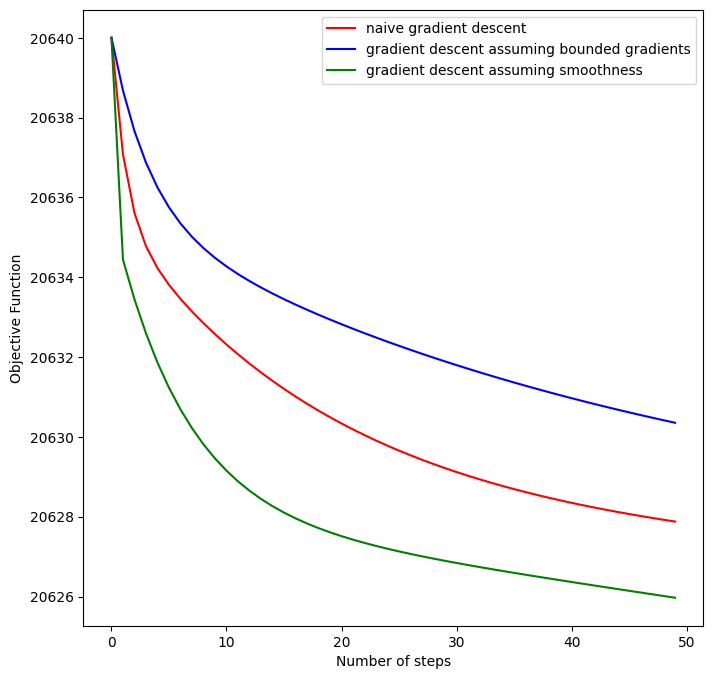

In [34]:
plt.figure(figsize=(8, 8))
plt.xlabel('Number of steps')
plt.ylabel('Objective Function')

plt.plot(range(len(gradient_objectives_naive)), gradient_objectives_naive,'red', label='naive gradient descent')
plt.plot(range(len(gradient_objectives_bounded)), gradient_objectives_bounded,'blue', label='gradient descent assuming bounded gradients')
plt.plot(range(len(gradient_objectives_smooth)), gradient_objectives_smooth,'green', label='gradient descent assuming smoothness')
plt.legend(loc='upper right')
plt.show()